In [1]:
import warnings
warnings.simplefilter('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as pt

In [4]:
%matplotlib inline

In [5]:
GA = pd.read_csv("Admission_Predict.csv") # Need a Dataset

In [6]:
GA

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,Yes,0.92
1,2,324,107,4,4.0,4.5,8.87,Yes,0.76
2,3,316,104,3,3.0,3.5,8.00,Yes,0.72
3,4,322,110,3,3.5,2.5,8.67,Yes,0.80
4,5,314,103,2,2.0,3.0,8.21,No,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,Yes,0.82
396,397,325,107,3,3.0,3.5,9.11,Yes,0.84
397,398,330,116,4,5.0,4.5,9.45,Yes,0.91
398,399,312,103,3,3.5,4.0,8.78,No,0.67


In [7]:
GA .shape

(400, 9)

In [8]:
GA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    object 
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 28.2+ KB


In [9]:
newdataset = GA.drop(['Serial No.', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research'] , axis = 1)

In [10]:
newdataset

,GRE Score,Chance of Admit
0,337,0.92
1,324,0.76
2,316,0.72
3,322,0.80
4,314,0.65
...,...,...
395,324,0.82
396,325,0.84
397,330,0.91
398,312,0.67


In [11]:
x = newdataset.iloc[:,0].values.reshape(-1,1)
y = newdataset.iloc[:,1].values.reshape(-1,1)

In [12]:
x

array([[337],
       [324],
       [316],
       [322],
       [314],
       [330],
       [321],
       [308],
       [302],
       [323],
       [325],
       [327],
       [328],
       [307],
       [311],
       [314],
       [317],
       [319],
       [318],
       [303],
       [312],
       [325],
       [328],
       [334],
       [336],
       [340],
       [322],
       [298],
       [295],
       [310],
       [300],
       [327],
       [338],
       [340],
       [331],
       [320],
       [299],
       [300],
       [304],
       [307],
       [308],
       [316],
       [313],
       [332],
       [326],
       [322],
       [329],
       [339],
       [321],
       [327],
       [313],
       [312],
       [334],
       [324],
       [322],
       [320],
       [316],
       [298],
       [300],
       [311],
       [309],
       [307],
       [304],
       [315],
       [325],
       [325],
       [327],
       [316],
       [318],
       [328],
       [332],
      

In [13]:
y

array([[0.92],
       [0.76],
       [0.72],
       [0.8 ],
       [0.65],
       [0.9 ],
       [0.75],
       [0.68],
       [0.5 ],
       [0.45],
       [0.52],
       [0.84],
       [0.78],
       [0.62],
       [0.61],
       [0.54],
       [0.66],
       [0.65],
       [0.63],
       [0.62],
       [0.64],
       [0.7 ],
       [0.94],
       [0.95],
       [0.97],
       [0.94],
       [0.76],
       [0.44],
       [0.46],
       [0.54],
       [0.65],
       [0.74],
       [0.91],
       [0.9 ],
       [0.94],
       [0.88],
       [0.64],
       [0.58],
       [0.52],
       [0.48],
       [0.46],
       [0.49],
       [0.53],
       [0.87],
       [0.91],
       [0.88],
       [0.86],
       [0.89],
       [0.82],
       [0.78],
       [0.76],
       [0.56],
       [0.78],
       [0.72],
       [0.7 ],
       [0.64],
       [0.64],
       [0.46],
       [0.36],
       [0.42],
       [0.48],
       [0.47],
       [0.54],
       [0.56],
       [0.52],
       [0.55],
       [0.

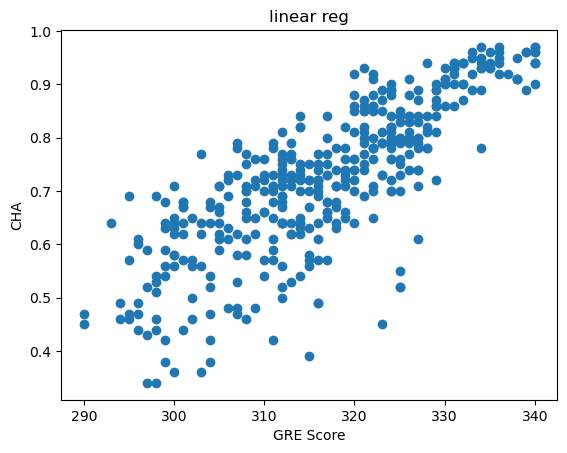

In [14]:
pt.scatter(x,y)
pt.xlabel('GRE Score')
pt.ylabel('CHA')
pt.title('linear reg')
pt.show()

In [15]:
pip install -U scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train , X_test , Y_train ,Y_test = train_test_split(x ,y ,train_size = 0.8 , random_state = 0)

In [18]:
X_train.shape

(320, 1)

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lm = LinearRegression()

In [21]:
lm.fit(X_train , Y_train)

LinearRegression()

In [22]:
y_predict = lm.predict(X_test)

In [23]:
y_predict

array([[0.64740806],
       [0.63728454],
       [0.81950792],
       [0.6170375 ],
       [0.71827271],
       [0.64740806],
       [0.67777862],
       [0.67777862],
       [0.88024905],
       [0.87012553],
       [0.55629637],
       [0.89037257],
       [0.75876679],
       [0.57654341],
       [0.83975496],
       [0.6676551 ],
       [0.67777862],
       [0.84987848],
       [0.70814919],
       [0.68790215],
       [0.84987848],
       [0.82963144],
       [0.56641989],
       [0.50567876],
       [0.75876679],
       [0.56641989],
       [0.51580228],
       [0.69802567],
       [0.92074313],
       [0.69802567],
       [0.67777862],
       [0.78913736],
       [0.67777862],
       [0.51580228],
       [0.8093844 ],
       [0.82963144],
       [0.73851975],
       [0.78913736],
       [0.62716102],
       [0.89037257],
       [0.77901384],
       [0.69802567],
       [0.76889032],
       [0.79926088],
       [0.75876679],
       [0.77901384],
       [0.70814919],
       [0.627

In [24]:
y_predict.shape

(80, 1)

In [25]:
COMP = pd.DataFrame(X_test , columns = ['GRE'])

In [26]:
COMP

,GRE
0,309
1,308
2,326
3,306
4,316
...,...
75,311
76,306
77,313
78,334


In [27]:
COMP['AVLDATAA']=Y_test

In [28]:
COMP

,GRE,AVLDATAA
0,309,0.71
1,308,0.70
2,326,0.79
3,306,0.73
4,316,0.72
...,...,...
75,311,0.61
76,306,0.69
77,313,0.62
78,334,0.93


In [29]:
COMP['PRIDATA']=y_predict

In [30]:
COMP

,GRE,AVLDATAA,PRIDATA
0,309,0.71,0.647408
1,308,0.70,0.637285
2,326,0.79,0.819508
3,306,0.73,0.617037
4,316,0.72,0.718273
...,...,...,...
75,311,0.61,0.667655
76,306,0.69,0.617037
77,313,0.62,0.687902
78,334,0.93,0.900496


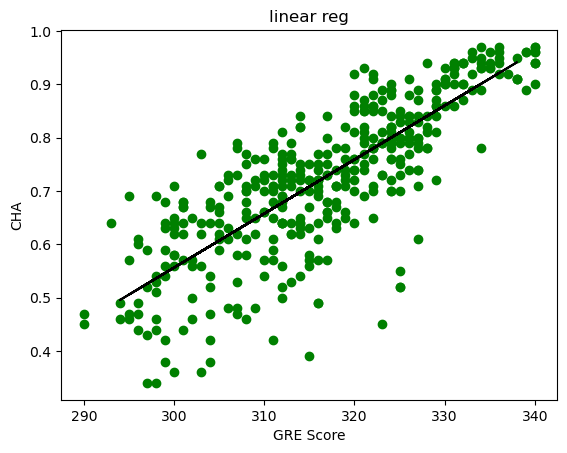

In [31]:
pt.scatter(x,y, color = 'green')
pt.plot(X_test,y_predict , color ='black')
pt.xlabel('GRE Score')
pt.ylabel('CHA')
pt.title('linear reg')
pt.show()

In [32]:
from sklearn.metrics import mean_squared_error , mean_absolute_error ,r2_score

In [33]:
mean_squared_error(Y_test,y_predict)

0.008254091184558793

In [34]:
mean_absolute_error(Y_test,y_predict)

0.06577018755736426

In [35]:
r2_score(Y_test,y_predict)

0.5456668070172048